In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from scipy.stats import randint

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [2]:
# Import dataframe

mat = pd.read_csv('student-mat.csv', sep=';')
por = pd.read_csv('student-por.csv', sep=';')
both = pd.merge(mat, por, how='outer', suffixes=['_mat','_por'], on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [3]:
# Encoding dummy variables

math = pd.get_dummies(mat, drop_first=True)
Port = pd.get_dummies(por, drop_first=True)

# **Mathematics Dataset**

In [4]:
# Train & Test samples for Mathematics

Xm = math.drop('G3', axis=1)
ym = math['G3']

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm,ym, test_size=0.2, random_state=24)

In [5]:
# Repeated K-Fold cross validator

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=24)

# **Random Forest Regression**

In [6]:
# Random Forest Regression (GridSearchCV)
# Finding best parameters

rfr = RandomForestRegressor()
params = {'n_estimators':[100,250,500,750],
          'min_samples_split':list(np.arange(2,10,2)),
          'min_samples_leaf':list(np.arange(2,10,2)),
          'min_weight_fraction_leaf':[0,0.1,0.2,0.3,0.4,0.5],
          'min_impurity_decrease':[0,0.1,0.2,0.5],
          'max_features':['auto','sqrt','log2']}

rfr_grid = GridSearchCV(rfr, params, cv=5)
rfr_grid.fit(Xm_train, ym_train)

print(rfr_grid.best_params_)

{'max_features': 'auto', 'min_impurity_decrease': 0, 'min_samples_leaf': 4, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0, 'n_estimators': 250}


In [6]:
# Random Forest Regression (Final)

rfr_final = RandomForestRegressor(n_estimators = 250, min_samples_split = 6,
                             min_samples_leaf = 4, min_weight_fraction_leaf=0,
                            min_impurity_decrease = 0, max_features = 'auto' )
rfr_final.fit(Xm_train, ym_train)

random_forest_final_score = cross_val_score(rfr_final,Xm_train, ym_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ",random_forest_final_score)

Cross Validation score:  0.8575683046214835


In [7]:
# Random Forest Regression (Original)

rfr = RandomForestRegressor()
rfr.fit(Xm_train, ym_train)

random_forest_score = cross_val_score(rfr,Xm_train, ym_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ", random_forest_score)

Cross Validation score:  0.8531320741166842


# **Gradient Boosting Regression**

In [17]:
# Gradient Boosting Regression (GridSearchCV)
# Finding best parameters

gradient = GradientBoostingRegressor()

params = {'n_estimators':[250,500,750,1000],
          'min_weight_fraction_leaf':[0,0.1,0.2,0.3,0.4,0.5],
          'max_depth':list(np.arange(3,11,1)),
          'min_impurity_decrease':[6,10,12,14,16]}

gradient_grid = GridSearchCV(gradient, params, cv=5)
gradient_grid.fit(Xm_train, ym_train)
print(gradient_grid.best_params_)

{'max_depth': 4, 'min_impurity_decrease': 12, 'min_weight_fraction_leaf': 0, 'n_estimators': 750}


In [8]:
# Gradient Boosting Regression (Final)

gradient_final = GradientBoostingRegressor(n_estimators=750, min_weight_fraction_leaf = 0,
                                   max_depth = 4, min_impurity_decrease = 12 )
gradient_final.fit(Xm_train, ym_train)

gradient_boosting_final_score = cross_val_score(gradient_final,Xm_train, ym_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ",gradient_boosting_final_score)

Cross Validation score:  0.8641143179608165


In [9]:
# Gradient Boosting Regression (Original)

gradient = GradientBoostingRegressor()
gradient.fit(Xm_train, ym_train)

gradient_boosting_score = cross_val_score(gradient,Xm_train, ym_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ",gradient_boosting_score)

Cross Validation score:  0.8566960903270663


# **XGBoost**

In [11]:
# XGBoost (GridSearchCV)

xgboost = XGBRegressor()

params = {'eta':[0.1,0.3,0.5],
         'gamma':[5,10,15,20],
         'max_depth':[3,6,7,9],
         'min_child_weight':[1,2,3,4],
         'max_delta_step':[0,2,5,8,10,12],
         'subsample':[0.9, 0.95,1],
         'alpha':[0,1,2],
         'lambda':[1,2,3]}

xg_grid = GridSearchCV(xgboost, params, cv=5)

xg_grid.fit(Xm_train, ym_train)

print(xg_grid.best_params_)

{'alpha': 0, 'eta': 0.3, 'gamma': 15, 'lambda': 2, 'max_delta_step': 10, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.9}


In [10]:
# XGBoost(Final)

xgboost_final = XGBRegressor(eta=0.3, gamma = 15, max_depth = 7, min_child_weight = 2,
                      max_delta_step = 10, subsample = 0.9, alpha = 0, reg_lambda = 2)
xgboost_final.fit(Xm_train, ym_train)

xgboost_final_score = cross_val_score(xgboost_final,Xm_train, ym_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ",xgboost_final_score)

Cross Validation score:  0.8721941752670935


In [11]:
# XGBoost (Original)

xgboost = XGBRegressor()
xgboost.fit(Xm_train, ym_train)

xgboost_score = cross_val_score(xgboost,Xm_train, ym_train,cv=cv, scoring='r2').mean()
print("Cross Validation score: ", xgboost_score)

Cross Validation score:  0.8411025765671089


# **Model Evaluation**

In [12]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 10),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [13]:
name = ['Random Forest','Gradient Boosting', 'XGBoost']
x_indexes = np.arange(len(name))
width = 0.4

cv_score = [random_forest_score, gradient_boosting_score, xgboost_score]
cv_score_round = [round(score, 4) for score in cv_score]

cv_score_final = [random_forest_final_score, gradient_boosting_final_score, xgboost_final_score]
cv_score_final_round = [round(score, 4) for score in cv_score_final]

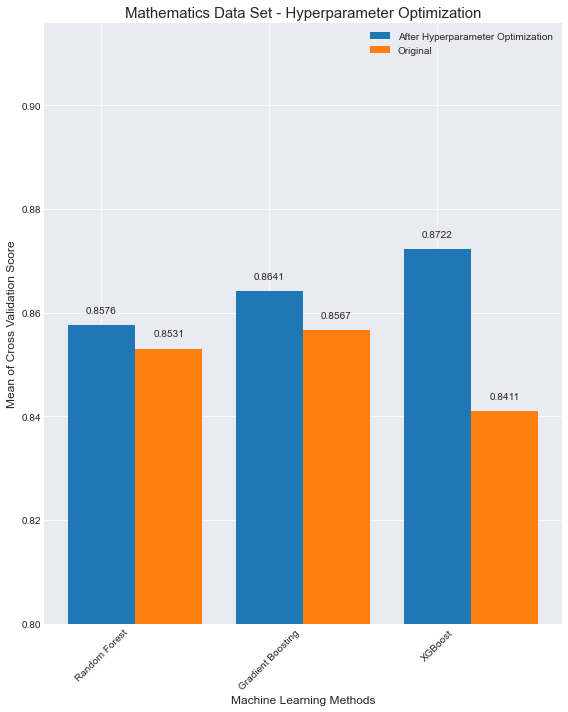

In [14]:
# Cross Validation Score Graph

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(8,10))


score_final_graph = ax.bar(x_indexes, cv_score_final_round, width=width, label = 'After Hyperparameter Optimization')
score_graph = ax.bar(x_indexes+width, cv_score_round,width=width, label = 'Original')


autolabel(score_graph)
autolabel(score_final_graph)

ax.set_ylim(bottom=0.8)
ax.set_ylabel("Mean of Cross Validation Score", size=12)

ax.set_xlabel('Machine Learning Methods', size=12)
ax.set_xticks(ticks = x_indexes)
ax.set_xticklabels(name, rotation=45)

ax.set_title("Mathematics Data Set - Hyperparameter Optimization", size = 15)
plt.legend()

plt.tight_layout()
plt.savefig("Mathematics Data Set - Hyperparameter Optimization.png")
plt.show()

# **Important Features**

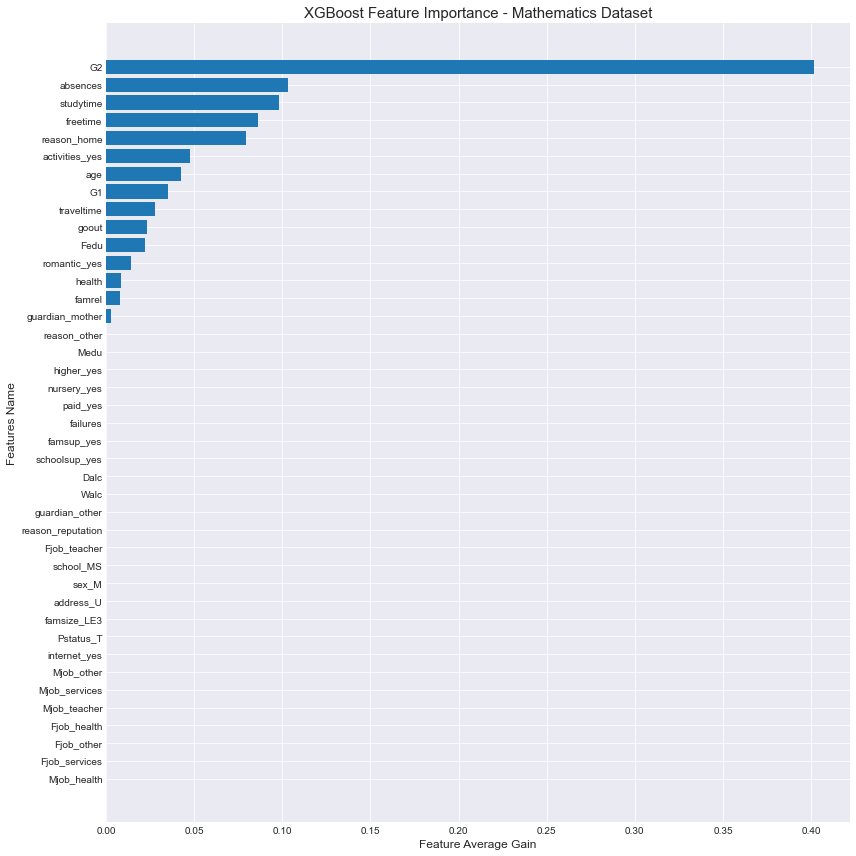

In [15]:
# Finding important feature - using gain
# Gain: the average gain across all splits the feature is used in.

plt.figure(figsize=(12,12))

sorted_idx = xgboost_final.feature_importances_.argsort()
x = Xm_train.columns[sorted_idx]
y = xgboost_final.feature_importances_[sorted_idx]

plt.barh(x, y)

plt.ylabel('Features Name', size = 12)
plt.xlabel("Feature Average Gain", size = 12)
plt.title("XGBoost Feature Importance - Mathematics Dataset", size = 15)

plt.tight_layout()
plt.savefig("XGBoost Feature Importance - Mathematics Dataset.png")
plt.show()

In [16]:
# Feature Average Gain

feature_gain = dict(zip(x, y))
sort_orders = sorted(feature_gain.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
    print(i[0],':', i[1])

G2 : 0.4017546
absences : 0.10294915
studytime : 0.09800496
freetime : 0.08630973
reason_home : 0.0793998
activities_yes : 0.047455262
age : 0.04277998
G1 : 0.03495551
traveltime : 0.027893133
goout : 0.023364754
Fedu : 0.021837613
romantic_yes : 0.014304444
health : 0.0082303975
famrel : 0.007823429
guardian_mother : 0.002937195
Mjob_health : 0.0
Fjob_services : 0.0
Fjob_other : 0.0
Fjob_health : 0.0
Mjob_teacher : 0.0
Mjob_services : 0.0
Mjob_other : 0.0
internet_yes : 0.0
Pstatus_T : 0.0
famsize_LE3 : 0.0
address_U : 0.0
sex_M : 0.0
school_MS : 0.0
Fjob_teacher : 0.0
reason_reputation : 0.0
guardian_other : 0.0
Walc : 0.0
Dalc : 0.0
schoolsup_yes : 0.0
famsup_yes : 0.0
failures : 0.0
paid_yes : 0.0
nursery_yes : 0.0
higher_yes : 0.0
Medu : 0.0
reason_other : 0.0


# **Predict on Test sample**

In [17]:
ym_pred = xgboost.predict(Xm_test)

xgboost_final_r2_score = r2_score(ym_test, ym_pred)
print("R2 Score:: ",xgboost_final_r2_score)

R2 Score::  0.8884562387814123
